# Data Quality in the Secondary Care Prescription Dataset (SCMD)

This notebook performs some basic quality checks on the SCMD data. In particular, we track (1) completeness of each field, (2) missing Defined Daily Doses (DDD) values, and (3) count how many hospitals appear every month.

Running this note book requires `ProfileReport` from `pandas_profiling`. The documentation is provided [here](https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/).

In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

import seaborn as sns

from datetime import datetime
from pandas_profiling import ProfileReport

In [2]:
# Import data 
df_scmd = pd.read_csv('../../data/scmd.csv')
df_ddd = pd.read_csv('../../data/ddd_week492021.csv').rename(columns={'VPID':'vmp_snomed_code'})

In [3]:
# Automatically detect dates
def auto_dt(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = pd.to_datetime(df[col])
            except ValueError:
                pass
            
auto_dt(df_scmd)
auto_dt(df_ddd)

In [4]:
# Combine dataframes
df_combined = df_scmd.merge(df_ddd[['vmp_snomed_code','DDD']], on=['vmp_snomed_code'],how='left')
df_combined['year_month'] = df_combined['year_month']

### Completeness of Each Field

In [5]:
# Get data profile
profile = ProfileReport(df_combined, title="SCMD + DDD Data Profiling Report")

In [6]:
# Display profiling results
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Unique Products Missing DDD

In [7]:
df_product_ddd = df_combined[['vmp_snomed_code','vmp_product_name','DDD']].drop_duplicates()
df_miss_ddd = df_product_ddd.loc[(df_product_ddd.DDD.isna())]
display(df_miss_ddd)

vmp_snomed_code                                   vmp_product_name  \
3        23204911000001105  Trastuzumab 600mg/5ml solution for injection v...   
11       23360011000001107  Calcium chloride 14.7% solution for infusion 5...   
14       23413211000001102  Gadobutrol 1mmol/ml solution for injection 5ml...   
16       23560011000001109  Dexamethasone 0.1% eye drops 0.4ml unit dose p...   
21       23603711000001109    Gemcitabine 1g/10ml solution for infusion vials   
...                    ...                                                ...   
7352709   3558711000001103         Estradiol 4mg / Norethisterone 1mg tablets   
7408290  11534811000001106  Vapour-permeable adhesive film dressing 5cm x 6cm   
7408342  30908611000001108  Polyurethane foam film dressing sterile withou...   
7408979  21195111000001101  Vapour-permeable adhesive film dressing 6.5cm ...   
7409003  34998511000001109  Generic UrgoStart plus Border dressing 20cm x ...   

         DDD  
3        NaN  
11       NaN  
14       NaN  
16       NaN  
21       NaN  
...      ...  
7352709  NaN  
7408290  NaN  
7408342  NaN  
7408979  NaN  
7409003  NaN  

[6756 rows x 3 columns]

### Number of Hospitals per Month

In [8]:
## Table
df_year_ods = df_combined[['year_month','ods_code']].drop_duplicates()
df_ods = df_year_ods.groupby(['year_month']).size().reset_index(name='counts')
display(df_ods)

year_month  counts
0  2019-01-01     220
1  2019-02-01     219
2  2019-03-01     219
3  2019-04-01     219
4  2019-05-01     220
5  2019-06-01     219
6  2019-07-01     220
7  2019-08-01     219
8  2019-09-01     219
9  2019-10-01     219
10 2019-11-01     219
11 2019-12-01     218
12 2020-01-01     219
13 2020-02-01     219
14 2020-03-01     218
15 2020-04-01     216
16 2020-05-01     216
17 2020-06-01     212
18 2020-07-01     213
19 2020-08-01     216
20 2020-09-01     216
21 2020-10-01     216
22 2020-11-01     214

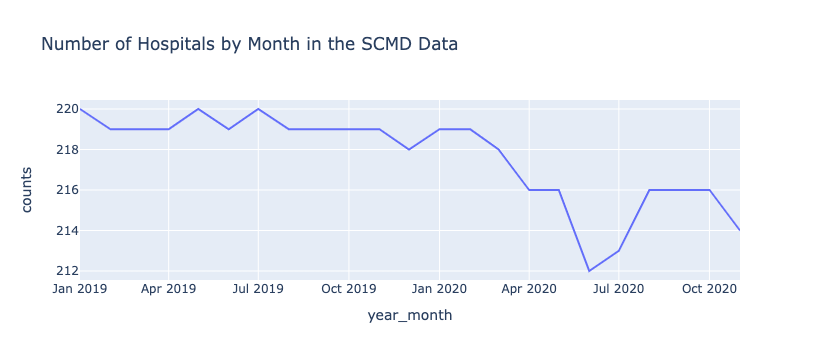

In [9]:
## Chart
fig=px.line(df_ods, x='year_month', y='counts', 
        title='Number of Hospitals by Month in the SCMD Data')
fig.show()